### Getting Started
- Create virtual environment

`python -m venv .venv`

- Activate virtual environment (on Windows)

`.venv\Scripts\activate.bat`

- Install Python libraries

`pip install -r requirements.txt`

- Create .env file with following variables. Use values appropriate to your environment

```
AZURE_OPENAI_ENDPOINT = "https://<REPLACE_ME>.openai.azure.com/"

AZURE_OPENAI_API_KEY = "<REPLACE_ME>"

AZURE_OPENAI_DALL_E_DEPLOYMENT = "<REPLACE_ME>"
```


### Import libraries

In [1]:
from openai import AzureOpenAI
import os
import requests
from PIL import Image
import json
from dotenv import load_dotenv
from IPython.display import display

### Load environment variables from .env file

In [2]:
load_dotenv(".env")

True

### Create Azure OpenAI client

In [3]:
client = AzureOpenAI(
    api_version="2024-02-01",  
    api_key=os.environ["AZURE_OPENAI_API_KEY"],  
    azure_endpoint=os.environ['AZURE_OPENAI_ENDPOINT']
)

### Generate image

In [4]:

result = client.images.generate(
    model=os.environ["AZURE_OPENAI_DALL_E_DEPLOYMENT"], # the name of your DALL-E 3 deployment
    prompt="a close-up of a black bear walking throughthe forest",
    n=1
)

### Process response and create folder to store image

In [5]:

json_response = json.loads(result.model_dump_json())

# Set the directory for the stored image
image_dir = os.path.join(os.curdir, 'images')

# If the directory doesn't exist, create it
if not os.path.isdir(image_dir):
    os.mkdir(image_dir)


### Retrieve and display the generated image

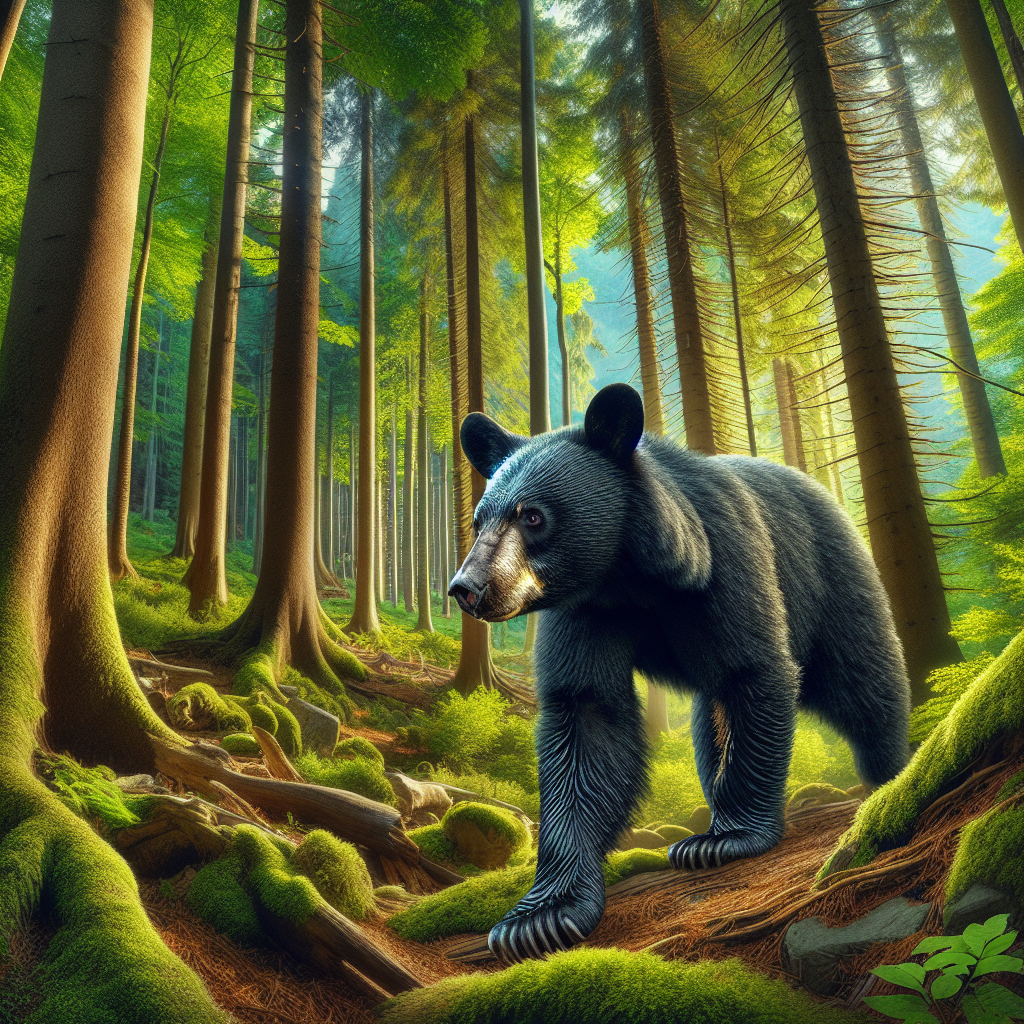

In [6]:
# Initialize the image path (note the filetype should be png)
image_path = os.path.join(image_dir, 'generated_image.png')

# Retrieve the generated image
image_url = json_response["data"][0]["url"]  # extract image URL from response
generated_image = requests.get(image_url).content  # download the image
with open(image_path, "wb") as image_file:
    image_file.write(generated_image)

# Display the image in the default image viewer
image = Image.open(image_path)
display(image)